# Extracion y entendimiento del db

In [2]:
import pandas as pd
import matplotlib.pyplot as pdt

file_path = "/mnt/c/Users/Kwuan/Documents/jsrr/platzi/proyecto sleep/Sleep_health_and_lifestyle_dataset.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Vision general del dataset

In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [6]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

## Analisis unidimensional de las variables

In [7]:
df["Sleep Disorder"].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [8]:
df["Occupation"].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [9]:
df["Age"].value_counts().sort_index(ascending=False)

59    16
58     6
57     9
56     2
55     2
54     7
53    17
52     9
51     8
50    20
49    11
48     3
45    14
44    30
43    34
42     9
41    12
40     4
39    15
38    20
37    20
36    12
35    12
34     2
33    13
32    17
31    18
30    13
29    13
28     5
27     1
Name: Age, dtype: int64

In [10]:
df["Quality of Sleep"].value_counts().sort_index(ascending=False)

9     71
8    109
7     77
6    105
5      7
4      5
Name: Quality of Sleep, dtype: int64

## Analisis multidimensional de las variables

In [11]:
# Calcular el promedio de la calidad del sueño por grupo de profesiones
promedio_sueno_por_profesion = df.groupby('Occupation')['Quality of Sleep'].mean()

# Ordenar los grupos de profesiones por promedio de calidad del sueño en orden ascendente
peor_sueno_profesiones = promedio_sueno_por_profesion.sort_values(ascending=True)

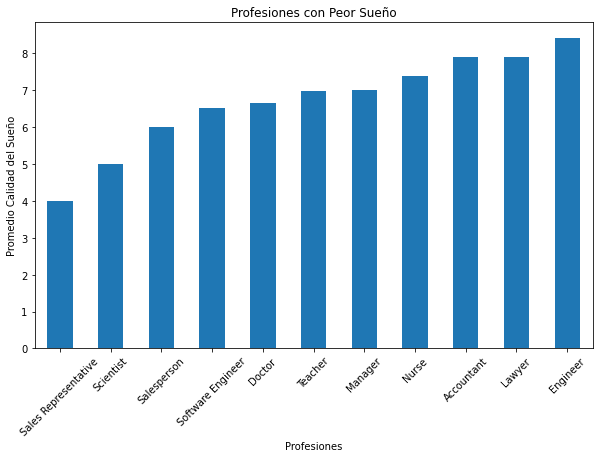

In [12]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
peor_sueno_profesiones.plot(kind='bar')

# Personalizar el gráfico
plt.xlabel('Profesiones')
plt.ylabel('Promedio Calidad del Sueño')
plt.title('Profesiones con Peor Sueño')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x (opcional)

# Mostrar el gráfico
plt.show()


In [13]:
# Agrupar los datos por edad y calidad de sueño
agrupado_edad_calidad_sueno = df.groupby(['Age', 'Quality of Sleep'])

# Calcular el tamaño de cada grupo
tamano_grupo = agrupado_edad_calidad_sueno.size()

# Restablecer el índice
tamano_grupo = tamano_grupo.reset_index()

# Ordenar los grupos por edad de mayor a menor
tamano_grupo_ordenado = tamano_grupo.sort_values('Age', ascending=False)


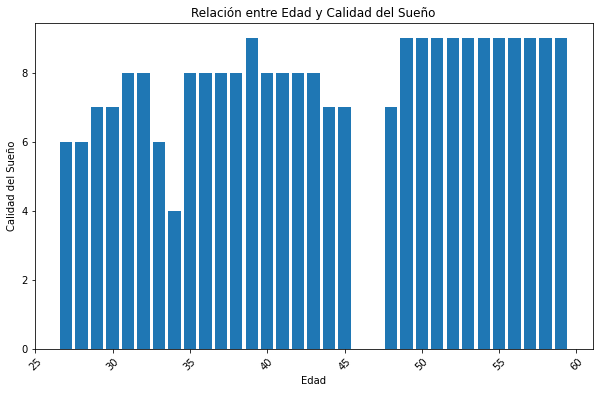

In [14]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.bar(tamano_grupo_ordenado['Age'], tamano_grupo_ordenado['Quality of Sleep'])

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('Calidad del Sueño')
plt.title('Relación entre Edad y Calidad del Sueño')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x (opcional)

# Mostrar el gráfico
plt.show()


In [15]:
# Agrupar los datos por calidad del sueño y calcular el promedio de la actividad física
relacion_quality_activity = df.groupby('Quality of Sleep')['Physical Activity Level'].mean()

# Ordenar los resultados por calidad del sueño de manera ascendente
relacion_quality_activity_ordenada = relacion_quality_activity.sort_values(ascending=True)

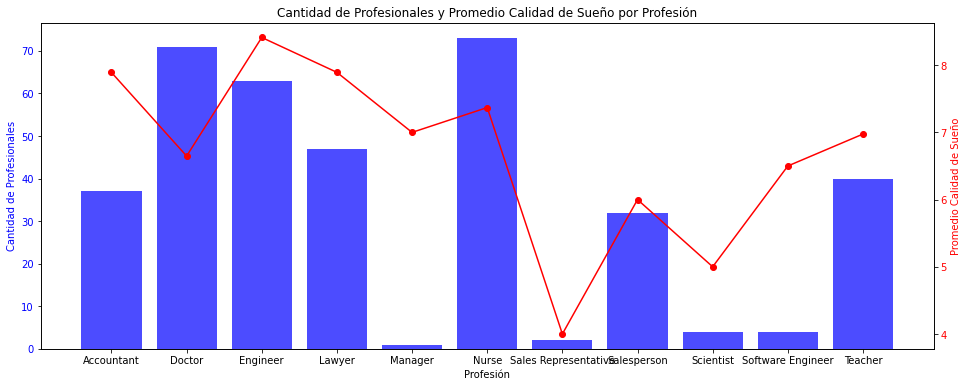

In [16]:
import pandas as pd

# Agrupar los datos por profesión y calcular la cantidad y promedio de calidad de sueño
agrupado_profesion = df.groupby('Occupation').agg({'Occupation': 'count', 'Quality of Sleep': 'mean'})
agrupado_profesion.columns = ['Cantidad de Profesionales', 'Promedio Calidad de Sueño']

import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(16, 6))
ax2 = ax1.twinx()

# Crear los gráficos de barras
ax1.bar(agrupado_profesion.index, agrupado_profesion['Cantidad de Profesionales'], color='blue', alpha=0.7)
ax2.plot(agrupado_profesion.index, agrupado_profesion['Promedio Calidad de Sueño'], color='red', marker='o')

# Configurar los ejes y etiquetas
ax1.set_xlabel('Profesión')
ax1.set_ylabel('Cantidad de Profesionales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2.set_ylabel('Promedio Calidad de Sueño', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Establecer el título del gráfico
plt.title('Cantidad de Profesionales y Promedio Calidad de Sueño por Profesión')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

/home/kwuan/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


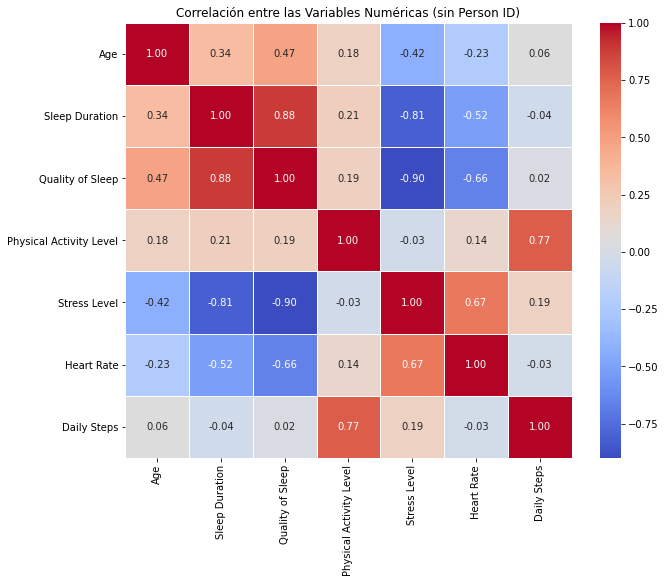

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Eliminar la columna "Person ID" del DataFrame numérico
if 'Person ID' in df_numerico.columns:
    df_numerico.drop('Person ID', axis=1, inplace=True)

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Establecer el título del heatmap
plt.title('Correlación entre las Variables Numéricas (sin Person ID)')

# Mostrar el heatmap
plt.show()

**Este hotmap da una indicacion de que la actividad fisica poco se relaciona con la calidad de sueño, por lo tanto se desechan de df**

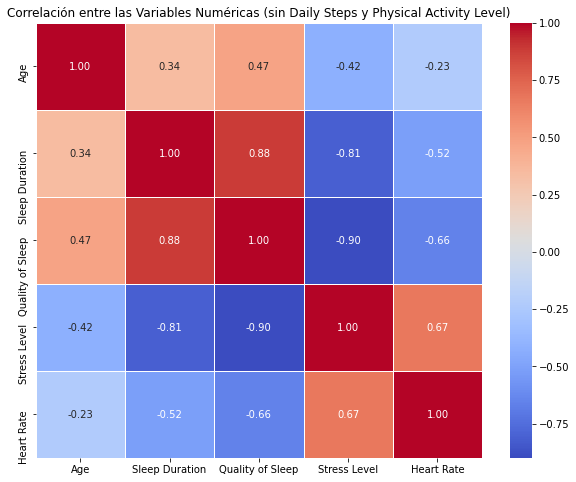

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Eliminar la columna "Person ID" del DataFrame numérico
if 'Person ID' in df_numerico.columns:
    df_numerico.drop('Person ID', axis=1, inplace=True)

# Eliminar las columnas "Daily Steps" y "Physical Activity Level" del DataFrame numérico
columnas_a_eliminar = ['Daily Steps', 'Physical Activity Level']
df_numerico.drop(columnas_a_eliminar, axis=1, inplace=True, errors='ignore')

# Calcular la matriz de correlación
correlation_matrix = df_numerico.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Establecer el título del heatmap
plt.title('Correlación entre las Variables Numéricas (sin Daily Steps y Physical Activity Level)')

# Mostrar el heatmap
plt.show()


In [19]:
df = df.drop(['Daily Steps', 'Physical Activity Level'], axis=1)

In [20]:
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,6,Overweight,126/83,77,None
1,2,Male,28,Doctor,6.2,6,8,Normal,125/80,75,None
2,3,Male,28,Doctor,6.2,6,8,Normal,125/80,75,None
3,4,Male,28,Sales Representative,5.9,4,8,Obese,140/90,85,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,8,Obese,140/90,85,Sleep Apnea


**Se extraen las variables categoricas a numericas para visualizarlas en el hotmap**

In [21]:
# Mapear las categorías a valores numéricos
mapeo_bmi = {'Normal': 1, 'Normal Weight': 1, 'Overweight': 2, 'Obese': 3}

# Cambiar los valores en la columna "BMI Category" utilizando el mapeo
df['BMI Category'] = df['BMI Category'].replace(mapeo_bmi)

In [22]:
# Dividir la columna "Blood Pressure" en dos columnas (sistólica y diastólica)
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)

# Convertir las columnas "Systolic BP" y "Diastolic BP" a números enteros
df['Systolic BP'] = df['Systolic BP'].astype(int)
df['Diastolic BP'] = df['Diastolic BP'].astype(int)

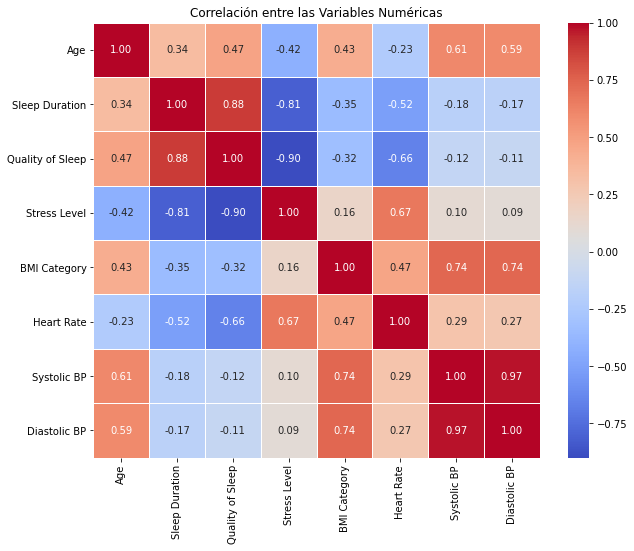

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Eliminar la columna "Person ID" del DataFrame numérico
if 'Person ID' in df_numerico.columns:
    df_numerico.drop('Person ID', axis=1, inplace=True)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Establecer el título del heatmap
plt.title('Correlación entre las Variables Numéricas')

# Mostrar el heatmap
plt.show()


**Systolic y Diastolic mantienen la misma correlacion con el resto de los datos asi q se mantendra usando solo Systolyc**

In [24]:
df = df.drop('Diastolic BP', axis=1)

In [25]:
import pandas as pd

# Mapear los valores de la columna "Sleep Disorder" a los nuevos valores
mapeo = {'None': 0, 'Sleep Apnea': 1, 'Insomnia': 2}
df['Sleep Disorder'] = df['Sleep Disorder'].replace(mapeo)

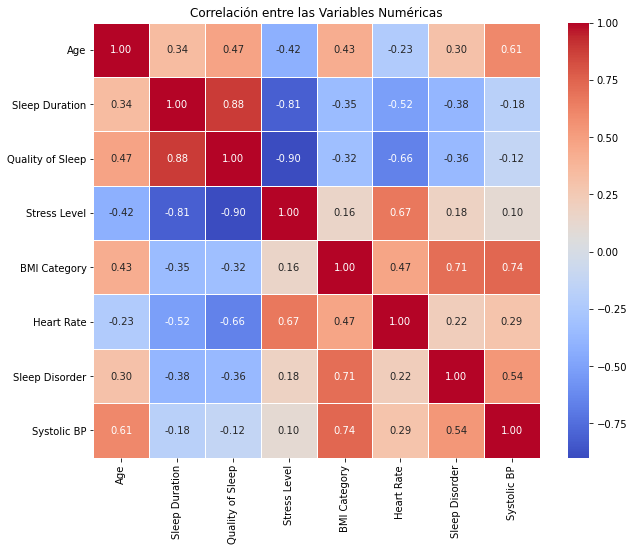

In [26]:
# Filtrar solo las columnas numéricas
df_numerico = df.select_dtypes(include='number')

# Eliminar la columna "Person ID" del DataFrame numérico
if 'Person ID' in df_numerico.columns:
    df_numerico.drop('Person ID', axis=1, inplace=True)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Establecer el título del heatmap
plt.title('Correlación entre las Variables Numéricas')

# Mostrar el heatmap
plt.show()

## Conclusiones del analisis
La variable mas importante para este estudio es Calidad de sueño "Quality of sleep" bajo los mapas de calor se concluyo que que la Edad, la duracion del sueño, el nivel de estres y el ritmo cardiaco son factores que influyen en la calidad del sueño, y factores como el ejercio fisico, el nivel de obesidad y presion sanguinia mantienen una baja correlacion

In [27]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('datos.csv', index=False)